# PROBLEM 4

#### Importing the necessary packages

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### (a) Perform PCA on the given dataset and reduce the dimension to two

In [34]:
df = pd.read_csv('/content/drive/MyDrive/SEM 7/ID5055/Assignment 1/Problem 4/Iris.csv')
df.columns = ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']
x = df.drop('Species', axis = 1)
y = df['Species']

# Centralise the data and SVD calculation
mean = np.mean(x, axis = 0)
x_center = x - mean
u, s, vt = np.linalg.svd(x_center)

# First two Principle Component Calculations
pca_components = vt.T[:, :2]
x_pca = x_center @ (vt.T[:, :2])

#### (b) Plot the newly obtained features (Principal components) discriminating the species type

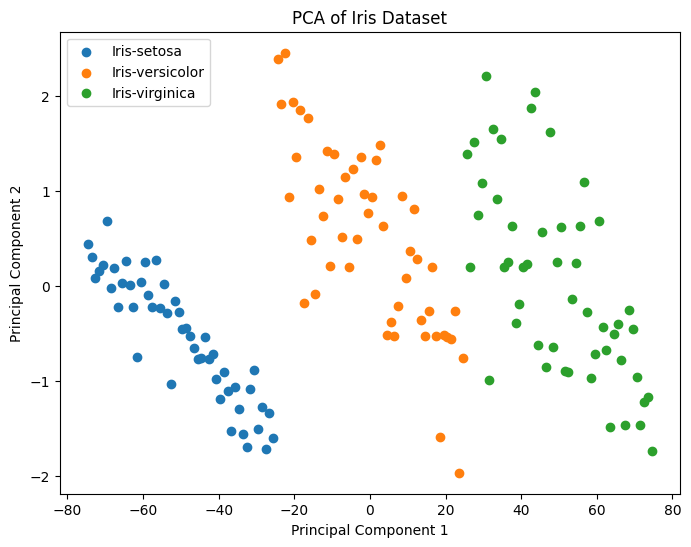

In [35]:
plt.figure(figsize=(8, 6))
for species in np.unique(y):
    plt.scatter(x_pca.loc[y == species, 0], x_pca.loc[y == species, 1], label=species)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.legend()
plt.show()

#### (c) Identify which one of the four features can be used to discriminate between the species (Use the coefficient of principal components to answer)

In [38]:
coefficients = pca_components.T  # Coefficients of principal components

# Print the coefficients of the principal components for each original feature
for i, feature_name in enumerate(x.columns):
    print(f'Coefficient for {feature_name}: {coefficients[:, i]}')

Coefficient for Id: [ 0.99913157 -0.04071433]
Coefficient for SepalLengthCm: [0.01365776 0.49432522]
Coefficient for SepalWidthCm: [-0.00396685 -0.01499187]
Coefficient for PetalLengthCm: [0.0358369  0.82236709]
Coefficient for PetalWidthCm: [0.01579744 0.2783389 ]


The larger the absolute value of the coefficient for a particular feature, the more influence that feature has on the corresponding principal component. In other words, a feature with a larger coefficient contributes more to the separation of the data in the PCA space.

From these coefficients, we can see that the feature "PetalLengthCm" has the largest absolute coefficients for both principal components. This indicates that "PetalLengthCm" contributes the most to the separation of the data points in the PCA space. Therefore, "PetalLengthCm" is likely the feature that can be used to discriminate between the species most effectively based on the PCA results.
